In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

# FRED API Key
api_key = '881689cb9ec77b596a3a07eb9afeb9b1'

#STEP 4
# Define function to fetch data from FRED
def fetch_fred_data(series_id, api_key):
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'])
    return df[['date', 'value']]

# Fetch personal loan data
consumer_loan_series_id = 'TOTALSL'
consumer_loan_data = fetch_fred_data(consumer_loan_series_id, api_key)
consumer_loan_data.columns = ['Date', 'PersonalLoanAmount']

# Fetch credit card data
credit_card_series_id = 'RCCCBBALTOT'
credit_card_data = fetch_fred_data(credit_card_series_id, api_key)
credit_card_data.columns = ['Date', 'Creditcardbalances']


In [ ]:
#filtering data for date
start_date = '2019-01-01'
end_date = '2023-12-31'
consumer_loan_data = consumer_loan_data[(consumer_loan_data['Date'] >= start_date) & (consumer_loan_data['Date'] <= end_date)]
credit_card_data = credit_card_data[(credit_card_data['Date'] >= start_date) & (credit_card_data['Date'] <= end_date)]

#STEP 5
# Merge data into a single DataFrame
loan_data = pd.merge(consumer_loan_data, credit_card_data, on='Date', how='outer')

In [ ]:
# Data description
loan_data.describe()

,Date,PersonalLoanAmount,Creditcardbalances
count,60,60.000000,20.000000
mean,2021-06-16 06:24:00,4473.906379,724.350000
min,2019-01-01 00:00:00,4026.910980,604.260000
25%,2020-03-24 06:00:00,4163.881133,655.892500
50%,2021-06-16 00:00:00,4435.397110,715.555000
75%,2022-09-08 12:00:00,4823.645665,769.262500
max,2023-12-01 00:00:00,5023.699590,911.860000
std,NaN,346.849240,84.708041


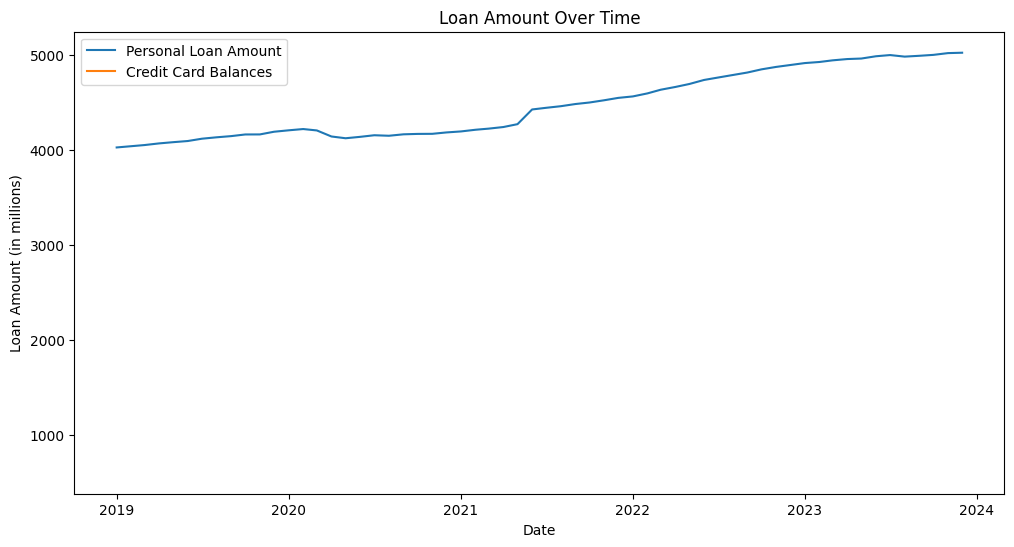

This shows only a marginal increament in the amount of loan generated over time


In [ ]:
# Plot Time Series Data
plt.figure(figsize=(12, 6))
plt.plot(loan_data['Date'], loan_data['PersonalLoanAmount'], label='Personal Loan Amount')
plt.plot(loan_data['Date'], loan_data['Creditcardbalances'], label='Credit Card Balances')
plt.xlabel('Date')
plt.ylabel('Loan Amount (in millions)')
plt.title('Loan Amount Over Time')
plt.legend()
plt.show()

print('This shows only a marginal increament in the amount of loan generated over time')

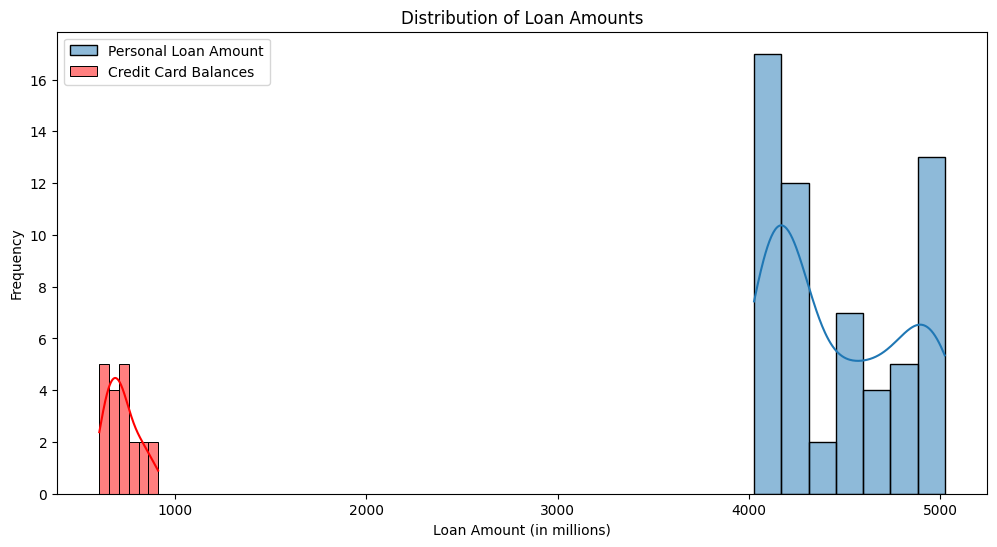

Personal loan amounts clearly outweighs credit balance balances, because personal loans provide better leverage opportunities than credit cards


In [ ]:
# Plot Distribution of Loan Amounts
plt.figure(figsize=(12, 6))
sns.histplot(loan_data['PersonalLoanAmount'].dropna(), kde=True, label='Personal Loan Amount')
sns.histplot(loan_data['Creditcardbalances'].dropna(), kde=True, color='red', label='Credit Card Balances')
plt.xlabel('Loan Amount (in millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.legend()
plt.show()
print('Personal loan amounts clearly outweighs credit balance balances, because personal loans provide better leverage opportunities than credit cards')

In [ ]:
# Calculate correlation between Personal loan amount and Credit card balances
correlation = loan_data[['PersonalLoanAmount', 'Creditcardbalances']].corr()

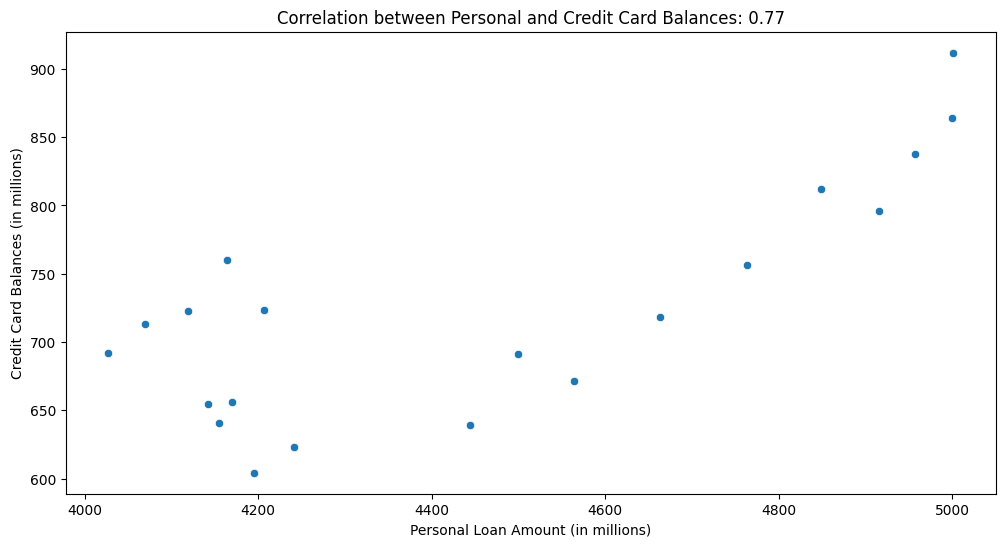

The shape of the scatter plots indicates non-linearity between credit card draw downs and existing personal loans


In [ ]:
# Plot Correlation
plt.figure(figsize=(12, 6))
sns.scatterplot(x=loan_data['PersonalLoanAmount'], y=loan_data['Creditcardbalances'])
plt.xlabel('Personal Loan Amount (in millions)')
plt.ylabel('Credit Card Balances (in millions)')
plt.title(f'Correlation between Personal and Credit Card Balances: {correlation.iloc[0, 1]:.2f}')
plt.show()
print('The shape of the scatter plots indicates non-linearity between credit card draw downs and existing personal loans')


S&P 500 columns: Index([' Closing Price'], dtype='object')
Treasury columns: Index(['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr',
       '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
      dtype='object')

Missing values in S&P 500 data:
  Closing Price    0
dtype: int64

Missing values in Treasury data:
 2 Mo     0
3 Mo     0
4 Mo     0
6 Mo     0
1 Yr     0
2 Yr     0
3 Yr     0
5 Yr     0
7 Yr     0
10 Yr    0
20 Yr    0
30 Yr    0
dtype: int64
There are no missing values in either dataset, which is good for the reliability of our analysis

S&P 500 data:
             Closing Price   Returns
Date                                
2023-12-29         4769.83       NaN
2023-12-28         4783.35  0.002834
2023-12-27         4781.58 -0.000370
2023-12-26         4774.75 -0.001428
2023-12-22         4754.63 -0.004214

Treasury Yield Curve data:
            2 Mo  3 Mo  4 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  \
Date                                                      

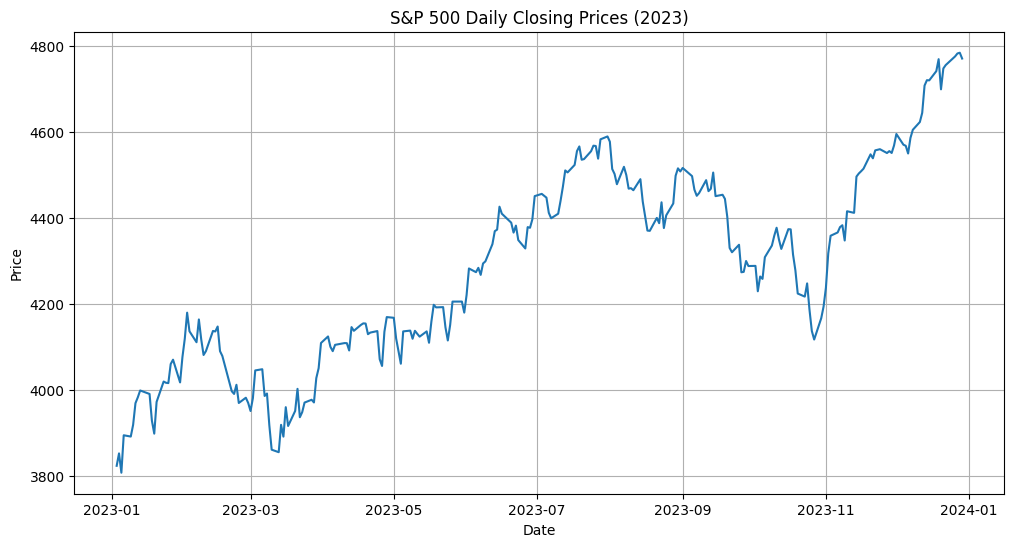

The graph shows the daily closing prices of the S&P 500 for the year 2023, indicating significant fluctuations and an overall upward trend.
Notable periods of volatility are observed, with marked peaks and troughs throughout the year, culminating in a high towards the end of 2023.


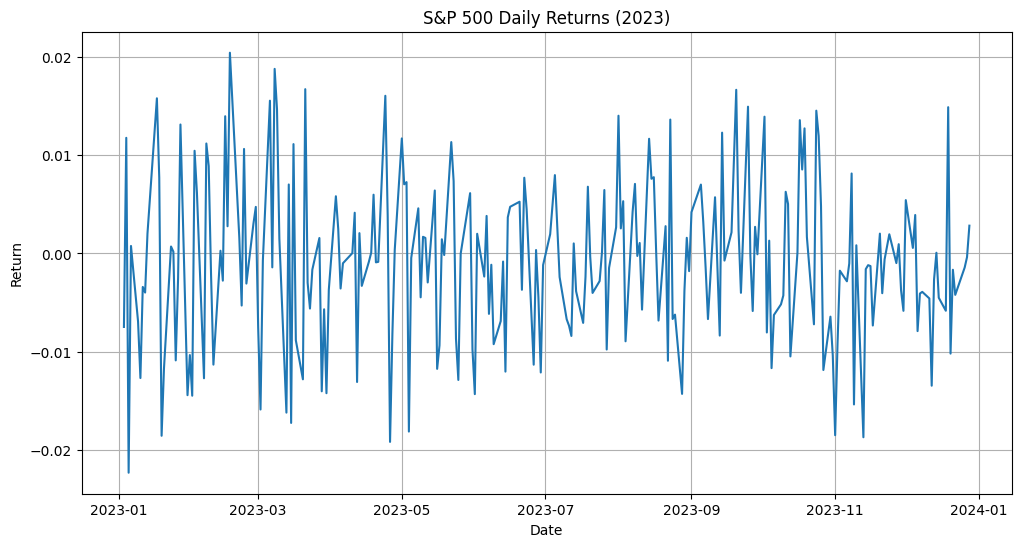

The graph depicts the daily returns of the S&P 500 for the year 2023, illustrating considerable volatility throughout the year.
The returns oscillate frequently around zero, with numerous spikes both upwards and downwards, reflecting the inherent market volatility.


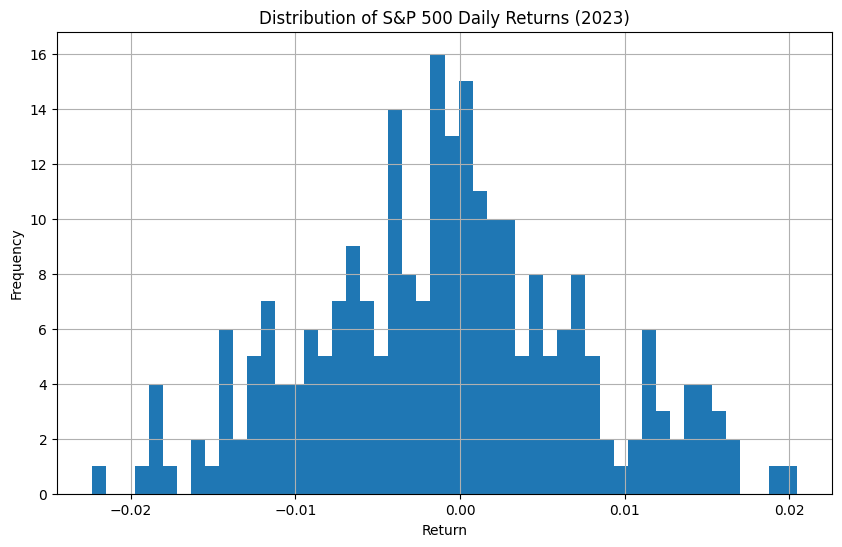

The histogram illustrates the distribution of daily returns for the S&P 500 in 2023.
The distribution is approximately normal, centered around a mean return close to zero,
with most returns falling between -0.01 and 0.01, indicating that small daily fluctuations were more common than extreme changes.


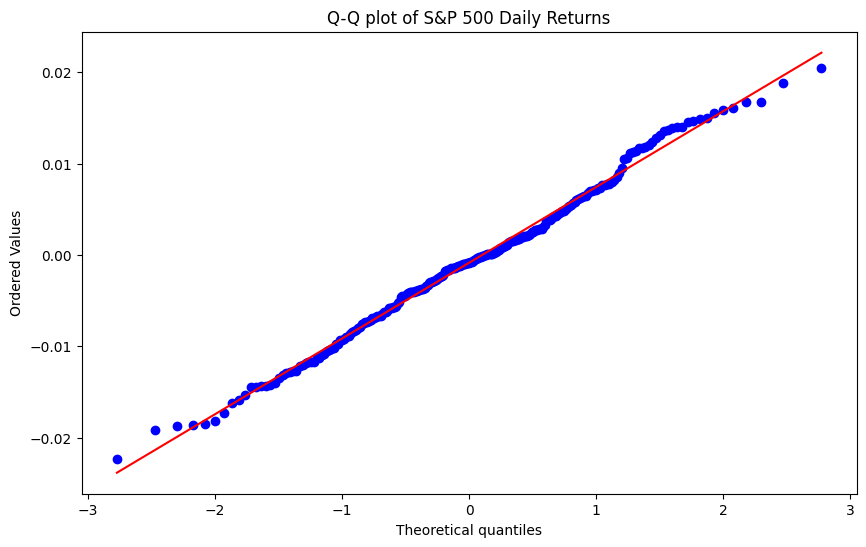

The Q-Q plot compares the distribution of S&P 500 daily returns for 2023 with a theoretical normal distribution.
The points closely follow the red line, indicating that the daily returns are approximately normally distributed,
with slight deviations at the tails suggesting mild departures from normality in extreme values.


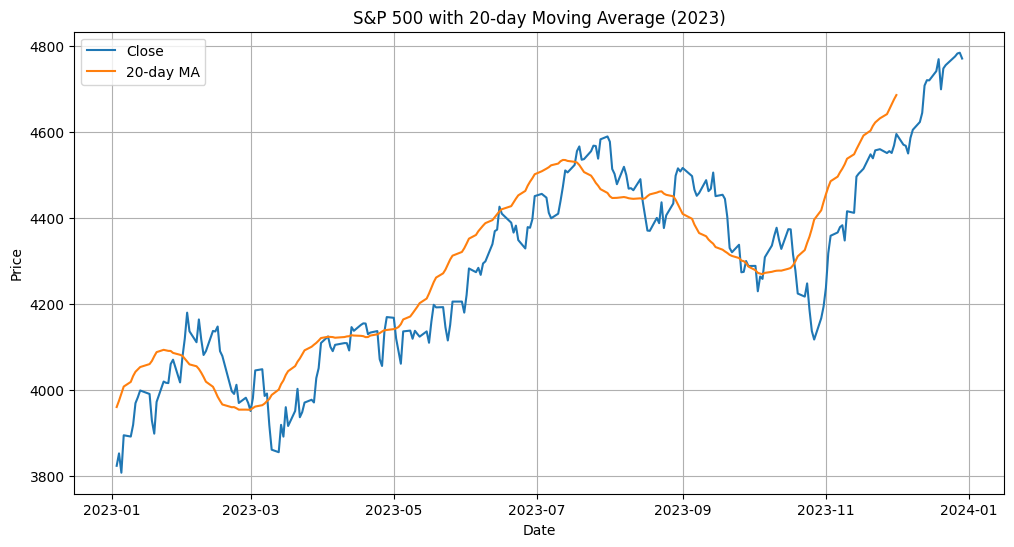

The graph shows the S&P 500 daily closing prices for 2023 along with its 20-day moving average (MA).
The 20-day MA smooths out short-term fluctuations and highlights the overall trend.
Throughout the year, the S&P 500 price often crosses the 20-day MA, indicating changes in the short-term trend,
with the MA providing a clearer view of the upward and downward trends in the market.


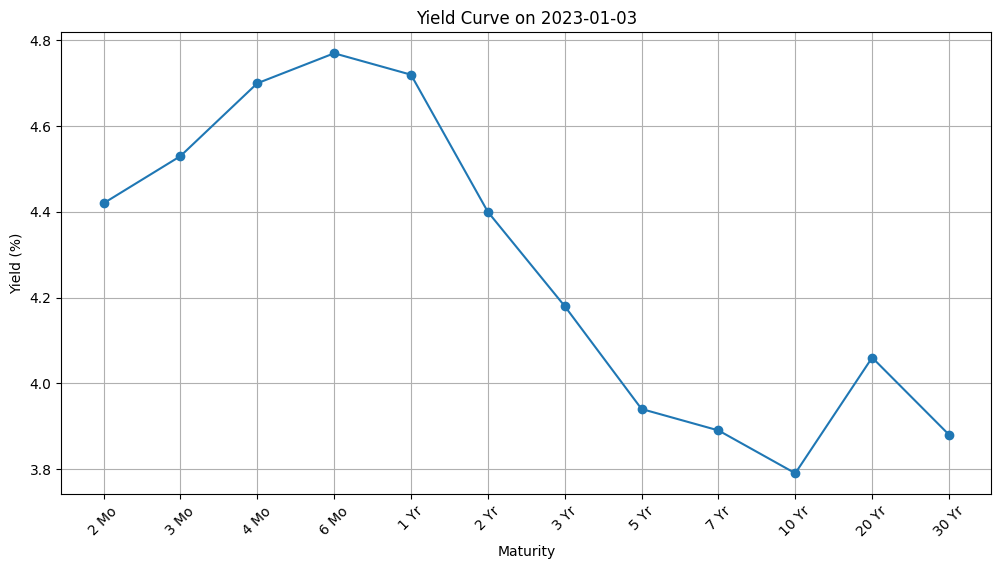

The yield curve graph for January 3, 2023, shows the relationship between bond yields and their maturities.
The curve is inverted, as indicated by the higher yields on short-term bonds compared to long-term bonds.
This inversion suggests market expectations of declining interest rates in the future,
often interpreted as a signal of economic slowdown or recession.


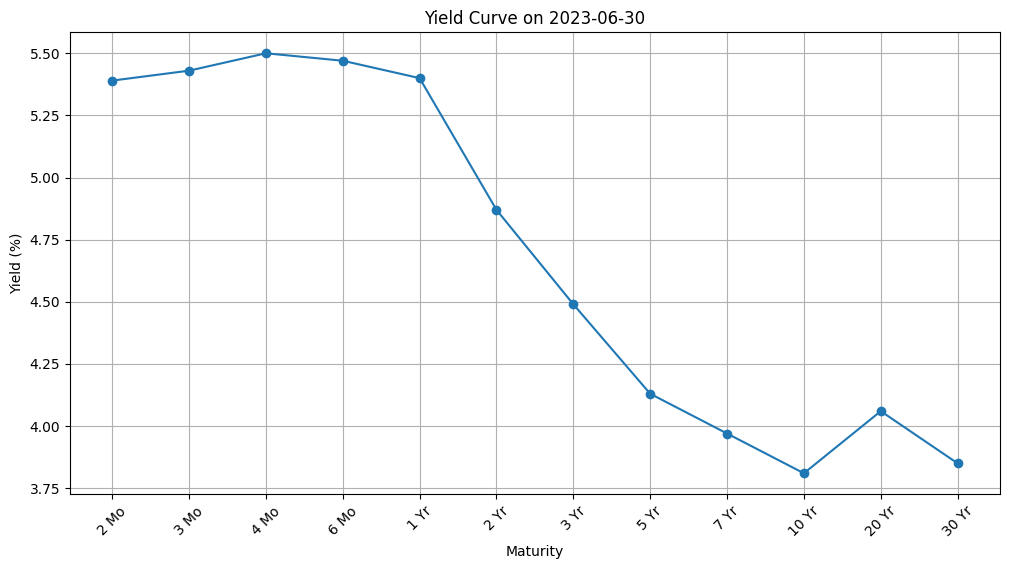

The yield curve graph for June 30, 2023, also shows an inverted yield curve with short-term yields higher than long-term yields.
Compared to January 3, 2023, the overall level of yields has increased, particularly in the short-term maturities.
This persistent inversion continues to suggest market concerns about economic slowdown or recession,
with an even stronger expectation of declining future interest rates.


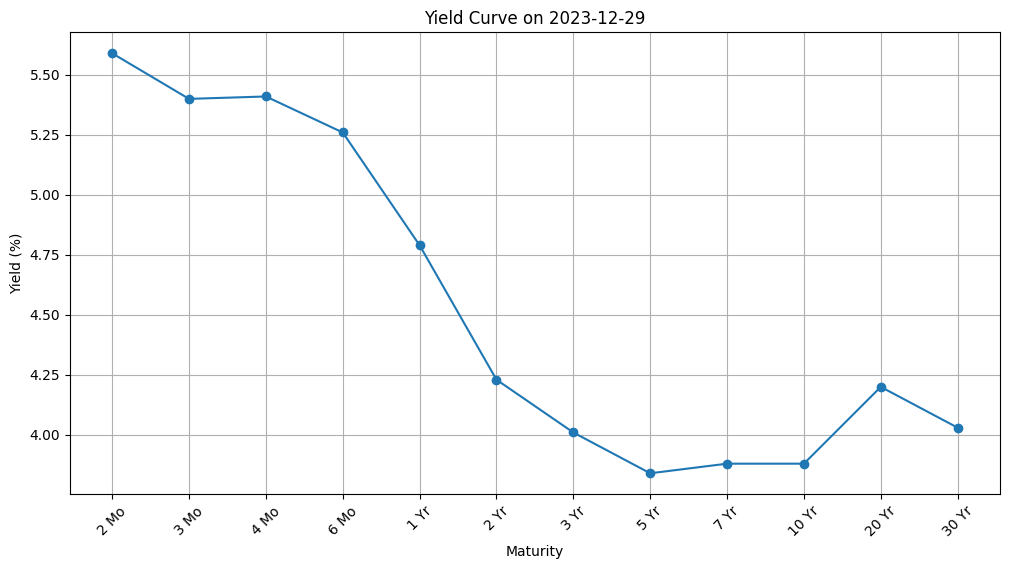

The yield curve graph for December 29, 2023, continues to show an inverted yield curve,
with the highest yields in the short-term maturities.
The yield for short-term bonds remains elevated above 5.5%, while long-term yields remain significantly lower.
This persistent inversion suggests continued market expectations of economic difficulties and future interest rate declines,
with the steep slope indicating strong concerns about near-term economic conditions.


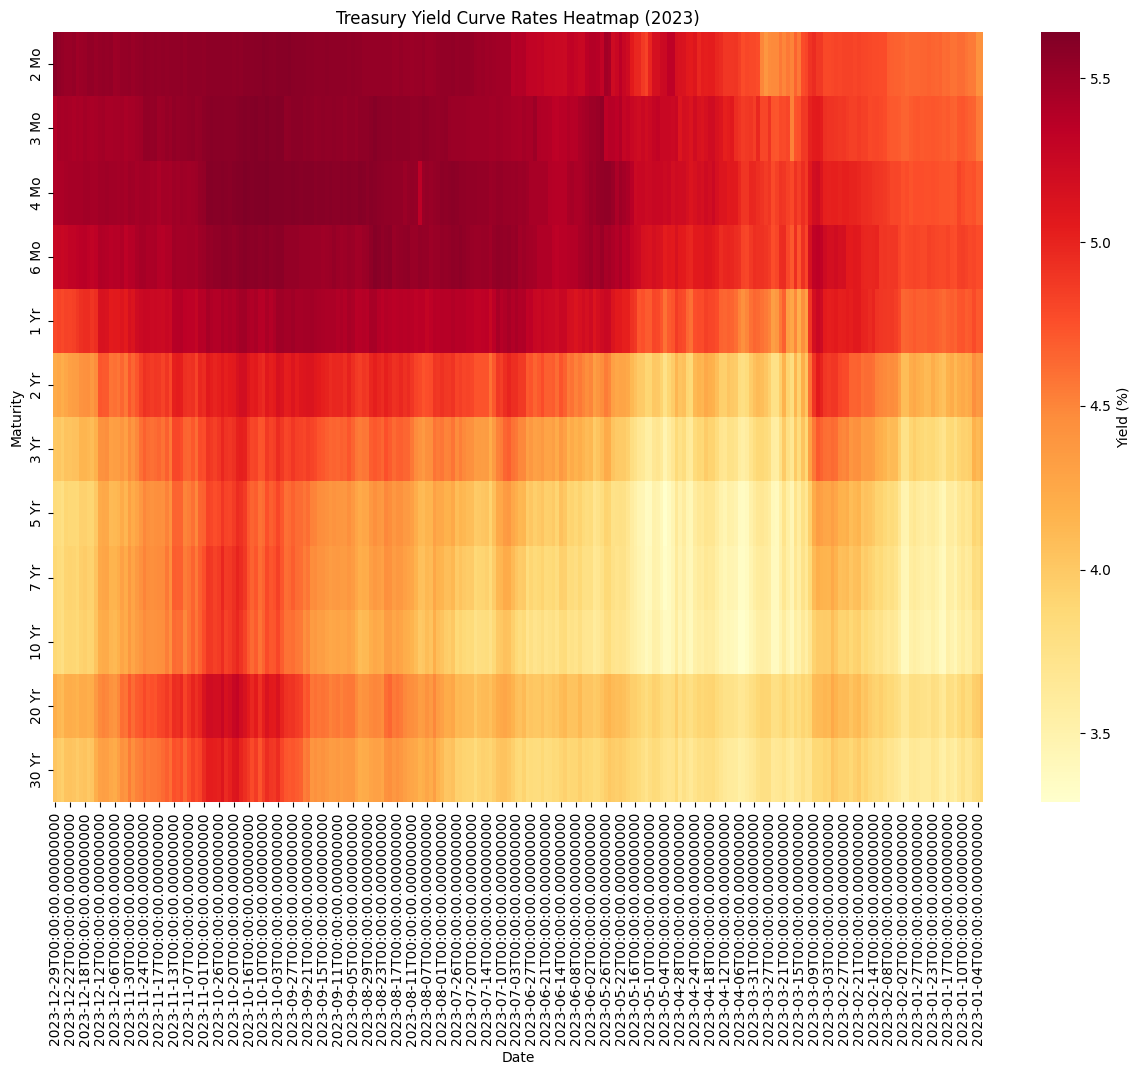

The heatmap displays the Treasury yield curve rates over the course of 2023, with maturities ranging from 2 months to 30 years.
The color gradient represents the yield percentage, where darker colors indicate higher yields and lighter colors indicate lower yields.
Throughout the year, short-term maturities exhibit higher yields compared to long-term maturities,
confirming the inverted yield curve observed in previous graphs. The variation in colors across different maturities
and dates highlights the dynamic changes in interest rates and the persistent inversion signaling economic concerns.


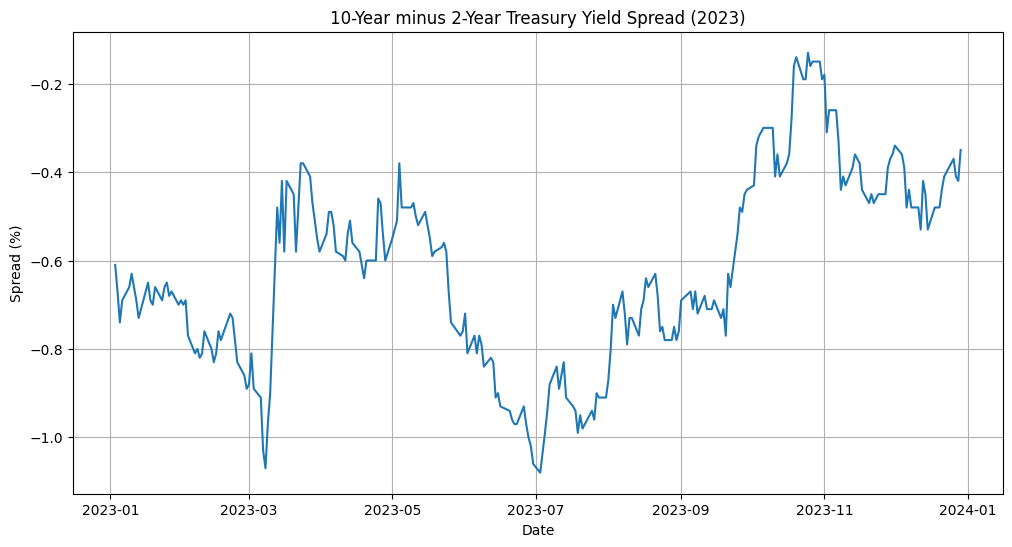

The graph shows the 10-year minus 2-year Treasury yield spread for 2023.
The spread remains negative throughout the year, indicating an inverted yield curve.
This persistent negative spread, often considered a recession indicator, reflects market expectations of
declining future interest rates. The fluctuations within the negative territory highlight varying degrees of market
sentiment regarding economic outlook, with occasional deepening of the inversion suggesting heightened concerns at specific times.


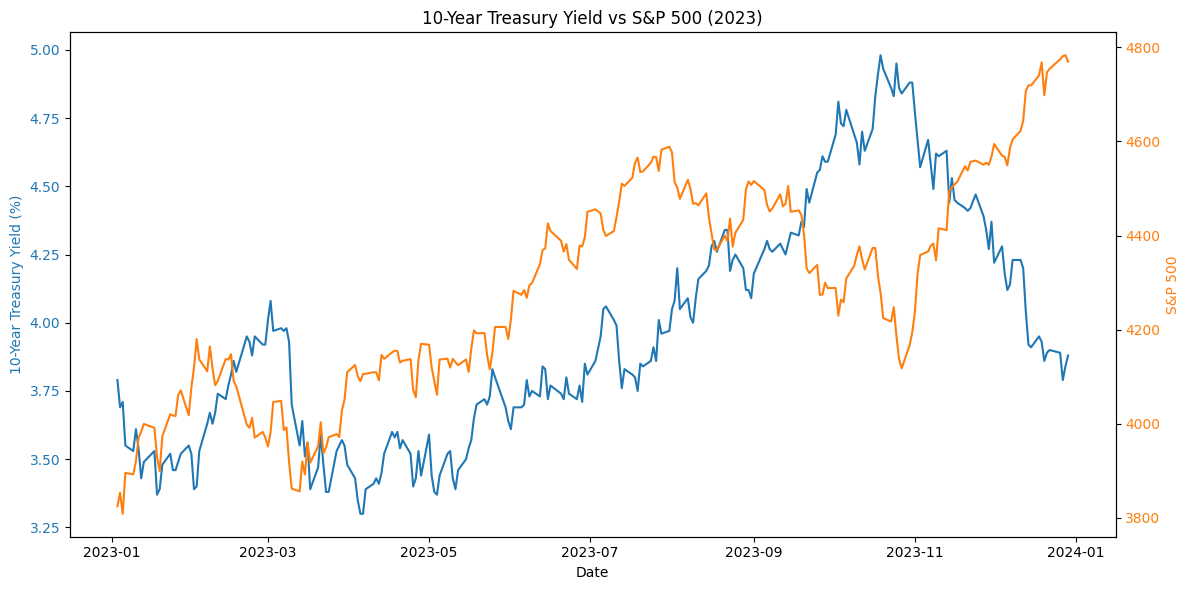

The graph compares the 10-year Treasury yield (blue line) with the S&P 500 index (orange line) for the year 2023.
The 10-year Treasury yield shows an overall upward trend, particularly noticeable from mid-2023, indicating rising interest rates.
The S&P 500, however, displays more volatility with significant peaks and troughs,
ultimately trending higher towards the end of the year. The inverse relationship between these two metrics
can be observed at various points, highlighting the interplay between bond yields and stock market performance.
Correlation between S&P 500 returns and changes in 10-year Treasury yield:
               Returns  10 Yr Change
Returns       1.000000     -0.068212
10 Yr Change -0.068212      1.000000
Correlation Analysis:
a)S&P 500 returns and changes in 10-year Treasury yield: -0.068212
b)S&P 500 returns and changes in yield curve steepness: -0.059058
Both correlations are weak negative, suggesting:
Leverage challenge: The weak correlation indicates that using T

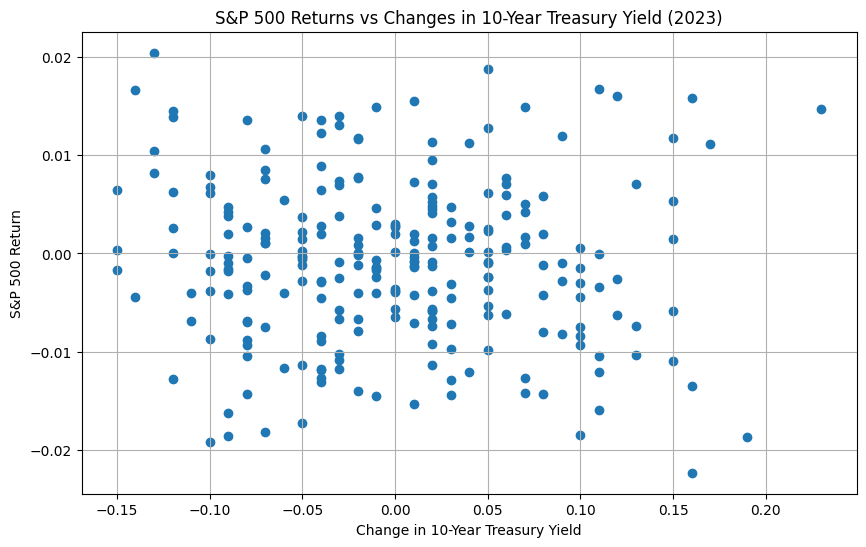

The scatter plot illustrates the relationship between S&P 500 returns and changes in the 10-year Treasury yield for 2023.
The plot shows a dispersed pattern with no strong correlation, indicating that daily changes in the 10-year Treasury yield
do not have a consistent impact on S&P 500 returns. The points are scattered around the origin,
suggesting that both positive and negative changes in Treasury yields can correspond to a wide range of stock market returns.


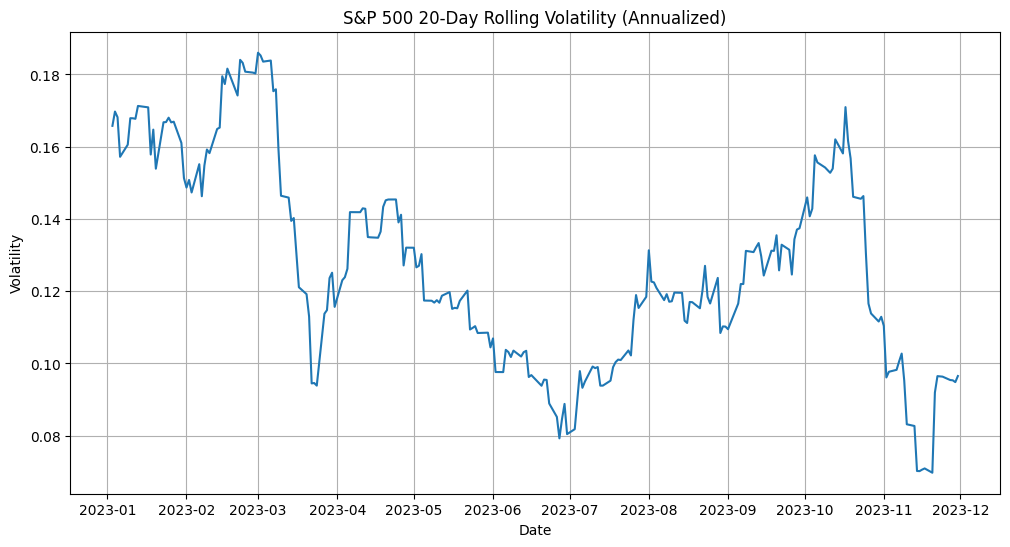

The graph shows the annualized 20-day rolling volatility of the S&P 500 for 2023.
Volatility fluctuates throughout the year, with notable peaks in early 2023 and during the mid-year months.
The volatility tends to decrease towards the end of the year, indicating a period of relative market stability.
These variations highlight periods of increased uncertainty and risk, as well as calmer market conditions,
reflecting the dynamic nature of market sentiment and external economic factors.


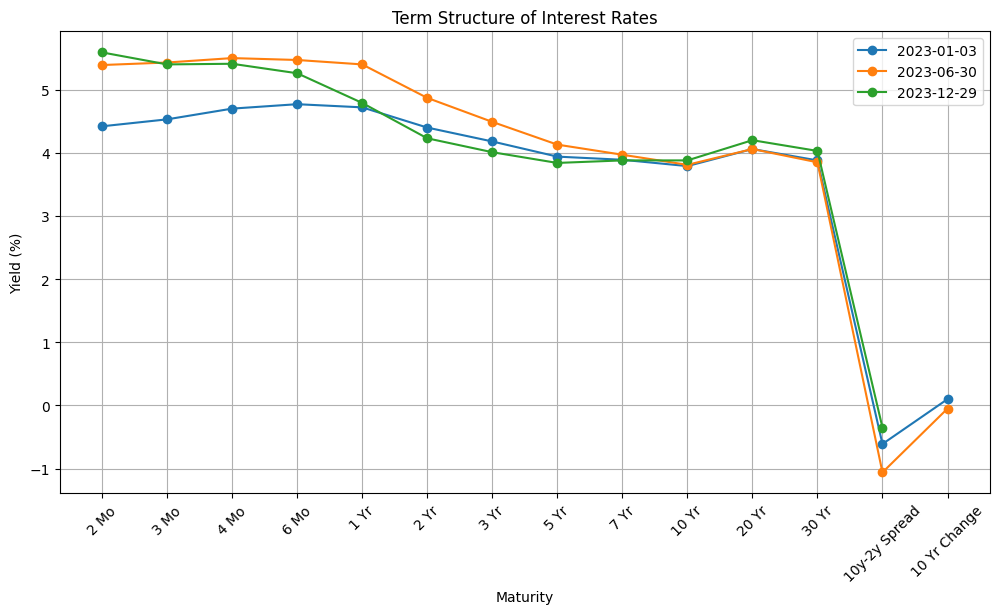

The graph shows the term structure of interest rates (yield curves) on three different dates in 2023:
January 3, June 30, and December 29.
January 3 (blue line): The yield curve is inverted, with shorter-term yields lower than those in mid-2023
but still above long-term yields.
June 30 (orange line): The yield curve remains inverted, with a general increase in yields across all maturities,
especially in short-term yields.
December 29 (green line): The yield curve is still inverted but shows a slight decrease in short-term yields
compared to mid-year levels, indicating adjustments in market expectations.
Throughout the year, the persistent inversion of the yield curve indicates ongoing market concerns
about future economic conditions and expectations of declining interest rates.


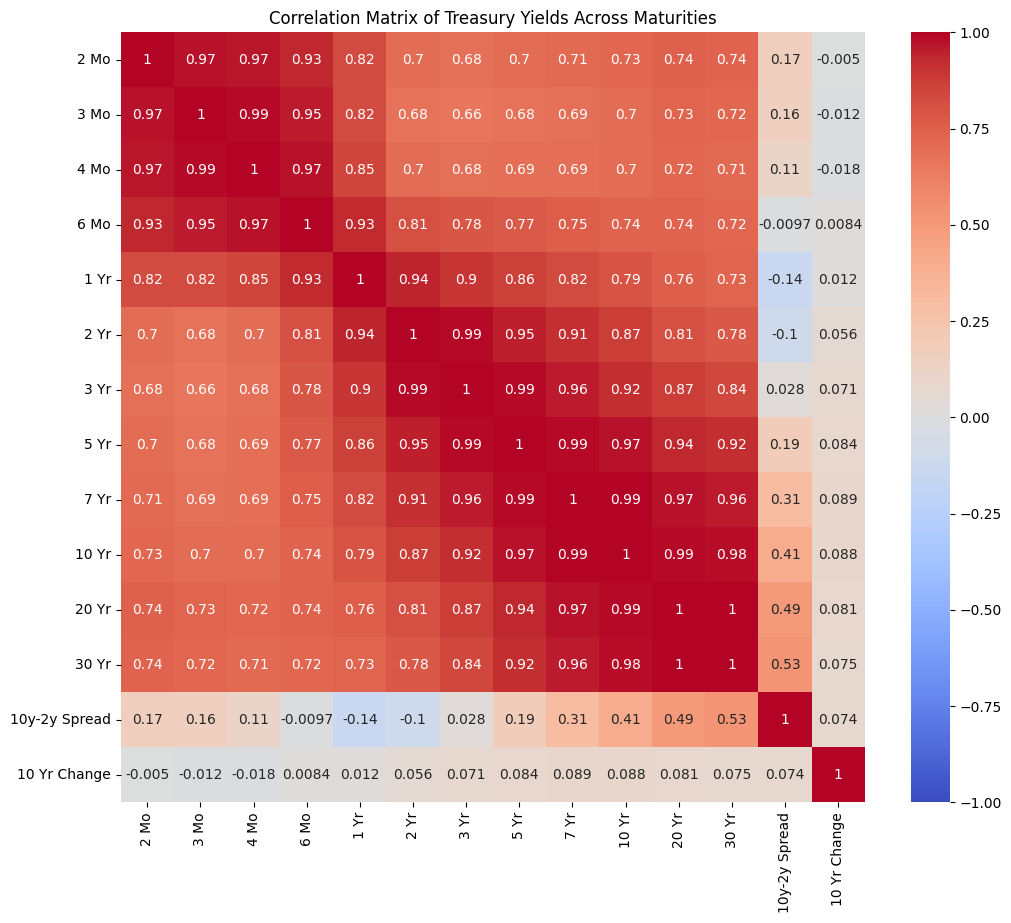

The correlation matrix shows the relationships between Treasury yields across different maturities. Key observations include:
High Positive Correlations: Most yields exhibit high positive correlations with each other,
particularly among longer-term maturities (2-year to 30-year). This indicates that changes in yields for these maturities
tend to move together.
Lower Correlations: Short-term maturities (2-month, 3-month) show lower correlations with longer-term yields,
suggesting more independent movement.
10Y-2Y Spread: The 10-year to 2-year spread shows negative or low positive correlations with short-term yields
and higher correlations with long-term yields, reflecting its role in capturing the slope of the yield curve.
10-Year Change: The change in the 10-year yield over time shows positive correlations across all maturities,
with particularly strong correlations with other long-term maturities, indicating synchronized movements
in response to market conditions.
This matrix provides

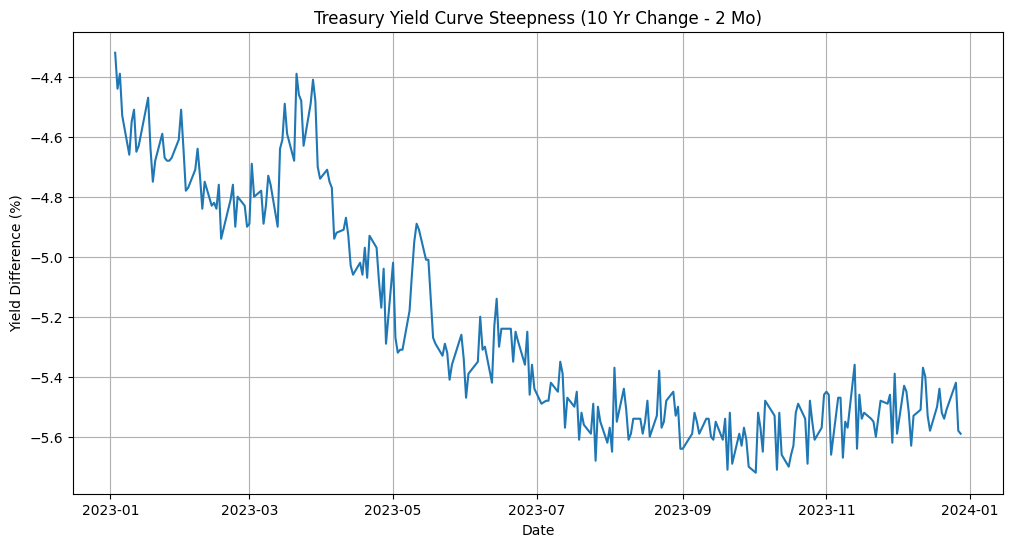

The graph shows the Treasury yield curve steepness, measured as the difference between the 10-year Treasury yield
change and the 2-month Treasury yield, throughout 2023. The yield difference declines steadily over the year,
indicating a decreasing steepness of the yield curve. This suggests that long-term interest rates have been rising slower
or even decreasing relative to short-term rates, contributing to a flatter or more inverted yield curve.
This trend reflects growing market concerns about future economic conditions and potential recessions.


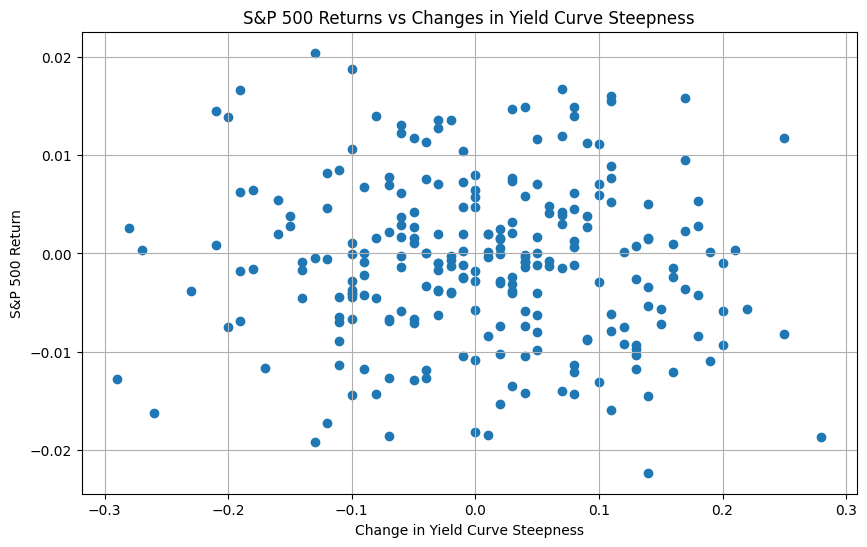

The scatter plot illustrates the relationship between S&P 500 returns and changes in yield curve steepness
(measured as the difference between the 10-year and 2-month Treasury yields) for 2023.
The points are widely dispersed with no clear pattern or correlation, suggesting that changes in the yield curve steepness
do not have a consistent or predictable impact on S&P 500 returns. This indicates that while yield curve steepness
may influence market sentiment, other factors play a significant role in driving stock market performance.
Correlation between S&P 500 returns and changes in yield curve steepness:
                   Returns  Steepness_Change
Returns           1.000000         -0.059058
Steepness_Change -0.059058          1.000000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
sp500_df = pd.read_csv('sp500_data.csv', parse_dates=['Date'], index_col='Date')
treasury_df = pd.read_csv('treasury_yield_curve.csv', parse_dates=['Date'], index_col='Date')

# Check column names
print("S&P 500 columns:", sp500_df.columns)
print("Treasury columns:", treasury_df.columns)

closing_price_column = ' Closing Price'

# Ensure all numeric columns are float type
sp500_df[closing_price_column] = sp500_df[closing_price_column].astype(float)
treasury_df = treasury_df.iloc[:, 1:].astype(float)  # Exclude the Date column

# Check for missing values
print("\nMissing values in S&P 500 data:\n", sp500_df.isnull().sum())
print("\nMissing values in Treasury data:\n", treasury_df.isnull().sum())
print("There are no missing values in either dataset, which is good for the reliability of our analysis")

# Calculate daily returns for S&P 500
sp500_df['Returns'] = sp500_df[closing_price_column].pct_change()

# Display the first few rows of each dataset
print("\nS&P 500 data:")
print(sp500_df.head())
print("\nTreasury Yield Curve data:")
print(treasury_df.head())
print("The data shows daily closing prices for the S&P 500 and various Treasury yields for different maturity")

# Plot daily closing prices
plt.figure(figsize=(12, 6))
plt.plot(sp500_df.index, sp500_df[closing_price_column])
plt.title('S&P 500 Daily Closing Prices (2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()
print("The graph shows the daily closing prices of the S&P 500 for the year 2023, indicating significant fluctuations and an overall upward trend.")
print("Notable periods of volatility are observed, with marked peaks and troughs throughout the year, culminating in a high towards the end of 2023.")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(sp500_df.index, sp500_df['Returns'])
plt.title('S&P 500 Daily Returns (2023)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.show()
print("The graph depicts the daily returns of the S&P 500 for the year 2023, illustrating considerable volatility throughout the year.")
print("The returns oscillate frequently around zero, with numerous spikes both upwards and downwards, reflecting the inherent market volatility.")

# Histogram of daily returns
plt.figure(figsize=(10, 6))
sp500_df['Returns'].hist(bins=50)
plt.title('Distribution of S&P 500 Daily Returns (2023)')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()
print("The histogram illustrates the distribution of daily returns for the S&P 500 in 2023.")
print("The distribution is approximately normal, centered around a mean return close to zero,")
print("with most returns falling between -0.01 and 0.01, indicating that small daily fluctuations were more common than extreme changes.")

# Q-Q plot to check for normality of returns
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(sp500_df['Returns'].dropna(), dist="norm", plot=ax)
ax.set_title("Q-Q plot of S&P 500 Daily Returns")
plt.show()
print("The Q-Q plot compares the distribution of S&P 500 daily returns for 2023 with a theoretical normal distribution.")
print("The points closely follow the red line, indicating that the daily returns are approximately normally distributed,")
print("with slight deviations at the tails suggesting mild departures from normality in extreme values.")

# Calculate and plot 20-day moving average
sp500_df['20d MA'] = sp500_df[closing_price_column].rolling(window=20).mean()
plt.figure(figsize=(12, 6))
plt.plot(sp500_df.index, sp500_df[closing_price_column], label='Close')
plt.plot(sp500_df.index, sp500_df['20d MA'], label='20-day MA')
plt.title('S&P 500 with 20-day Moving Average (2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
print("The graph shows the S&P 500 daily closing prices for 2023 along with its 20-day moving average (MA).")
print("The 20-day MA smooths out short-term fluctuations and highlights the overall trend.")
print("Throughout the year, the S&P 500 price often crosses the 20-day MA, indicating changes in the short-term trend,")
print("with the MA providing a clearer view of the upward and downward trends in the market.")

# Treasury Yield Curve Analysis

# Plot the yield curve at specific dates
def plot_yield_curve(date):
    plt.figure(figsize=(12, 6))
    plt.plot(treasury_df.columns, treasury_df.loc[date], marker='o')
    plt.title(f'Yield Curve on {date}')
    plt.xlabel('Maturity')
    plt.ylabel('Yield (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

plot_yield_curve('2023-01-03')  # Beginning of the year
print("The yield curve graph for January 3, 2023, shows the relationship between bond yields and their maturities.")
print("The curve is inverted, as indicated by the higher yields on short-term bonds compared to long-term bonds.")
print("This inversion suggests market expectations of declining interest rates in the future,")
print("often interpreted as a signal of economic slowdown or recession.")
plot_yield_curve('2023-06-30')  # Middle of the year
print("The yield curve graph for June 30, 2023, also shows an inverted yield curve with short-term yields higher than long-term yields.")
print("Compared to January 3, 2023, the overall level of yields has increased, particularly in the short-term maturities.")
print("This persistent inversion continues to suggest market concerns about economic slowdown or recession,")
print("with an even stronger expectation of declining future interest rates.")
plot_yield_curve('2023-12-29')  # End of the year
print("The yield curve graph for December 29, 2023, continues to show an inverted yield curve,")
print("with the highest yields in the short-term maturities.")
print("The yield for short-term bonds remains elevated above 5.5%, while long-term yields remain significantly lower.")
print("This persistent inversion suggests continued market expectations of economic difficulties and future interest rate declines,")
print("with the steep slope indicating strong concerns about near-term economic conditions.")

# Heatmap of yields across all maturities over time
plt.figure(figsize=(15, 10))
sns.heatmap(treasury_df.T, cmap='YlOrRd', cbar_kws={'label': 'Yield (%)'})
plt.title('Treasury Yield Curve Rates Heatmap (2023)')
plt.xlabel('Date')
plt.ylabel('Maturity')
plt.show()
print("The heatmap displays the Treasury yield curve rates over the course of 2023, with maturities ranging from 2 months to 30 years.")
print("The color gradient represents the yield percentage, where darker colors indicate higher yields and lighter colors indicate lower yields.")
print("Throughout the year, short-term maturities exhibit higher yields compared to long-term maturities,")
print("confirming the inverted yield curve observed in previous graphs. The variation in colors across different maturities")
print("and dates highlights the dynamic changes in interest rates and the persistent inversion signaling economic concerns.")

# Calculate and plot the 10-year and 2-year spread
treasury_df['10y-2y Spread'] = treasury_df['10 Yr'] - treasury_df['2 Yr']
plt.figure(figsize=(12, 6))
plt.plot(treasury_df.index, treasury_df['10y-2y Spread'])
plt.title('10-Year minus 2-Year Treasury Yield Spread (2023)')
plt.xlabel('Date')
plt.ylabel('Spread (%)')
plt.grid(True)
plt.show()
print("The graph shows the 10-year minus 2-year Treasury yield spread for 2023.")
print("The spread remains negative throughout the year, indicating an inverted yield curve.")
print("This persistent negative spread, often considered a recession indicator, reflects market expectations of")
print("declining future interest rates. The fluctuations within the negative territory highlight varying degrees of market")
print("sentiment regarding economic outlook, with occasional deepening of the inversion suggesting heightened concerns at specific times.")

# Combined Analysis

# Plot 10-year Treasury yield against S&P 500 index
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('10-Year Treasury Yield (%)', color='tab:blue')
ax1.plot(treasury_df.index, treasury_df['10 Yr'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('S&P 500', color='tab:orange')
ax2.plot(sp500_df.index, sp500_df[closing_price_column], color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('10-Year Treasury Yield vs S&P 500 (2023)')
fig.tight_layout()
plt.show()
print("The graph compares the 10-year Treasury yield (blue line) with the S&P 500 index (orange line) for the year 2023.")
print("The 10-year Treasury yield shows an overall upward trend, particularly noticeable from mid-2023, indicating rising interest rates.")
print("The S&P 500, however, displays more volatility with significant peaks and troughs,")
print("ultimately trending higher towards the end of the year. The inverse relationship between these two metrics")
print("can be observed at various points, highlighting the interplay between bond yields and stock market performance.")

# Calculate correlation between S&P 500 returns and changes in Treasury yields
treasury_df['10 Yr Change'] = treasury_df['10 Yr'].diff()
merged_df = pd.merge(sp500_df['Returns'], treasury_df['10 Yr Change'], left_index=True, right_index=True)
correlation = merged_df.corr()

print("Correlation between S&P 500 returns and changes in 10-year Treasury yield:")
print(correlation)
print("Correlation Analysis:")
print("a)S&P 500 returns and changes in 10-year Treasury yield: -0.068212")
print("b)S&P 500 returns and changes in yield curve steepness: -0.059058")
print("Both correlations are weak negative, suggesting:")
print("Leverage challenge: The weak correlation indicates that using Treasury bonds as a hedge against stock market movements")
print("might not be very effective, potentially increasing leverage risk.")
print("Non-linearity challenge: The relationship between bond yields and stock returns is not strong or linear,")
print("which complicates risk modeling.")

# Scatter plot of S&P 500 returns vs changes in 10-year Treasury yield
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['10 Yr Change'], merged_df['Returns'])
plt.title('S&P 500 Returns vs Changes in 10-Year Treasury Yield (2023)')
plt.xlabel('Change in 10-Year Treasury Yield')
plt.ylabel('S&P 500 Return')
plt.grid(True)
plt.show()
print("The scatter plot illustrates the relationship between S&P 500 returns and changes in the 10-year Treasury yield for 2023.")
print("The plot shows a dispersed pattern with no strong correlation, indicating that daily changes in the 10-year Treasury yield")
print("do not have a consistent impact on S&P 500 returns. The points are scattered around the origin,")
print("suggesting that both positive and negative changes in Treasury yields can correspond to a wide range of stock market returns.")

# Get the shortest and longest maturity column names
shortest_maturity = treasury_df.columns[0]
longest_maturity = treasury_df.columns[-1]

# Volatility analysis for S&P 500
sp500_df['Volatility'] = sp500_df['Returns'].rolling(window=20).std() * np.sqrt(252)  # Annualized volatility

plt.figure(figsize=(12, 6))
plt.plot(sp500_df.index, sp500_df['Volatility'])
plt.title('S&P 500 20-Day Rolling Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()
print("The graph shows the annualized 20-day rolling volatility of the S&P 500 for 2023.")
print("Volatility fluctuates throughout the year, with notable peaks in early 2023 and during the mid-year months.")
print("The volatility tends to decrease towards the end of the year, indicating a period of relative market stability.")
print("These variations highlight periods of increased uncertainty and risk, as well as calmer market conditions,")
print("reflecting the dynamic nature of market sentiment and external economic factors.")

# Term structure of interest rates
selected_dates = ['2023-01-03', '2023-06-30', '2023-12-29']
plt.figure(figsize=(12, 6))
for date in selected_dates:
    plt.plot(treasury_df.columns, treasury_df.loc[date], marker='o', label=date)
plt.title('Term Structure of Interest Rates')
plt.xlabel('Maturity')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
print("The graph shows the term structure of interest rates (yield curves) on three different dates in 2023:")
print("January 3, June 30, and December 29.")
print("January 3 (blue line): The yield curve is inverted, with shorter-term yields lower than those in mid-2023")
print("but still above long-term yields.")
print("June 30 (orange line): The yield curve remains inverted, with a general increase in yields across all maturities,")
print("especially in short-term yields.")
print("December 29 (green line): The yield curve is still inverted but shows a slight decrease in short-term yields")
print("compared to mid-year levels, indicating adjustments in market expectations.")
print("Throughout the year, the persistent inversion of the yield curve indicates ongoing market concerns")
print("about future economic conditions and expectations of declining interest rates.")

# Correlation matrix for different Treasury maturities
correlation_matrix = treasury_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Treasury Yields Across Maturities')
plt.show()
print("The correlation matrix shows the relationships between Treasury yields across different maturities. Key observations include:")
print("High Positive Correlations: Most yields exhibit high positive correlations with each other,")
print("particularly among longer-term maturities (2-year to 30-year). This indicates that changes in yields for these maturities")
print("tend to move together.")
print("Lower Correlations: Short-term maturities (2-month, 3-month) show lower correlations with longer-term yields,")
print("suggesting more independent movement.")
print("10Y-2Y Spread: The 10-year to 2-year spread shows negative or low positive correlations with short-term yields")
print("and higher correlations with long-term yields, reflecting its role in capturing the slope of the yield curve.")
print("10-Year Change: The change in the 10-year yield over time shows positive correlations across all maturities,")
print("with particularly strong correlations with other long-term maturities, indicating synchronized movements")
print("in response to market conditions.")
print("This matrix provides a comprehensive view of how different parts of the yield curve are interrelated.")

# Additional analysis: Yield curve steepness over time
treasury_df['Steepness'] = treasury_df[longest_maturity] - treasury_df[shortest_maturity]
plt.figure(figsize=(12, 6))
plt.plot(treasury_df.index, treasury_df['Steepness'])
plt.title(f'Treasury Yield Curve Steepness ({longest_maturity} - {shortest_maturity})')
plt.xlabel('Date')
plt.ylabel('Yield Difference (%)')
plt.grid(True)
plt.show()
print("The graph shows the Treasury yield curve steepness, measured as the difference between the 10-year Treasury yield")
print("change and the 2-month Treasury yield, throughout 2023. The yield difference declines steadily over the year,")
print("indicating a decreasing steepness of the yield curve. This suggests that long-term interest rates have been rising slower")
print("or even decreasing relative to short-term rates, contributing to a flatter or more inverted yield curve.")
print("This trend reflects growing market concerns about future economic conditions and potential recessions.")

# Relationship between S&P 500 returns and yield curve steepness
merged_df = pd.merge(sp500_df['Returns'], treasury_df['Steepness'], left_index=True, right_index=True)
merged_df['Steepness_Change'] = merged_df['Steepness'].diff()
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Steepness_Change'], merged_df['Returns'])
plt.title('S&P 500 Returns vs Changes in Yield Curve Steepness')
plt.xlabel('Change in Yield Curve Steepness')
plt.ylabel('S&P 500 Return')
plt.grid(True)
plt.show()
print("The scatter plot illustrates the relationship between S&P 500 returns and changes in yield curve steepness")
print("(measured as the difference between the 10-year and 2-month Treasury yields) for 2023.")
print("The points are widely dispersed with no clear pattern or correlation, suggesting that changes in the yield curve steepness")
print("do not have a consistent or predictable impact on S&P 500 returns. This indicates that while yield curve steepness")
print("may influence market sentiment, other factors play a significant role in driving stock market performance.")

print("Correlation between S&P 500 returns and changes in yield curve steepness:")
print(merged_df[['Returns', 'Steepness_Change']].corr())

In [3]:
import datetime
from datetime import date
from scipy.stats import pearsonr

import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yfin
from matplotlib import pyplot as plt

pd.options.display.float_format = "{:,.6f}".format

**EDA - EXPLORATORY DATA ANALYSIS FOR SCENARIO 3 (Money at a fixed rate for a business for a construction loan)**

In [4]:
# Load the dataset of debt leverage
Leverage = pd.read_csv('Debt-to-Equity ratio.csv')
Leverage.head()

,Year,Total Debt (Billions USD),Total Equity (Billions CNY),Total Equity (Billions USD),Debt-to-Equity
0,2018,61.600000,421.270000,57.950000,1.060000
1,2019,66.550000,495.840000,68.200000,0.980000
2,2020,76.530000,567.150000,78.010000,0.980000
3,2021,91.540000,631.680000,86.890000,1.050000
4,2022,102.060000,670.390000,92.210000,1.110000


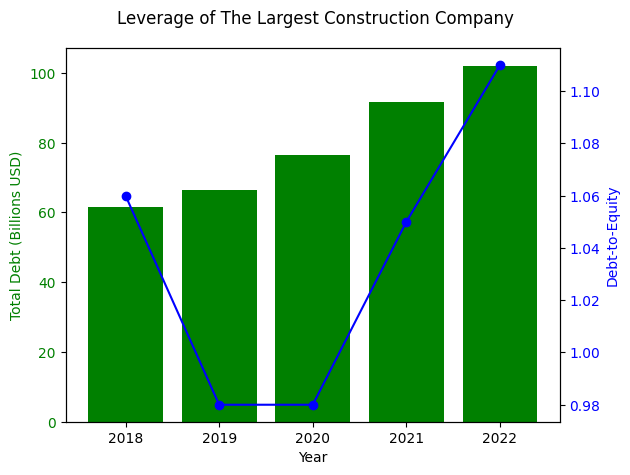

In [5]:
fig, ax1 = plt.subplots()

# Create bar chart on ax1
ax1.bar(Leverage['Year'], Leverage['Total Debt (Billions USD)'], color='g', label='Bar Values')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Debt (Billions USD)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()

# Create line chart on ax2
ax2.plot(Leverage['Year'], Leverage['Debt-to-Equity'], color='b', marker='o', label='Debt-to-Equity')
ax2.set_ylabel('Debt-to-Equity', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Add a title and show the plot
fig.suptitle('Leverage of The Largest Construction Company')
fig.tight_layout()  # Adjust layout to make room for the title
plt.show()

Total Debt and Debt-to-Equity ratio of one large construction firm had rised significantly; that indicates the large constructions tend to use more leverage on their business. Therefore, the leverage challenges exists in the construction lending activities.

In [12]:
# Load the dataset
Data_3 = pd.read_csv('Construction Loan Dataset 2.csv')
Data_3.head()

,DATE,REAINTRATREARAT10Y,FEDFUNDS,Reserves Required,TTLCONS,CPI
0,1/1/2010,1.297925,0.110000,"1,670.897484",822114,-0.160617
1,2/1/2010,1.124515,0.130000,"1,925.978312",814885,-0.120399
2,3/1/2010,0.998732,0.160000,"1,847.259911",821849,-0.054216
3,4/1/2010,1.309105,0.200000,"1,662.006188",829664,-0.001069
4,5/1/2010,1.226388,0.200000,"1,669.746826",823447,0.026482


In [7]:
Data_3.describe()

,REAINTRATREARAT10Y,FEDFUNDS,Reserves Required,TTLCONS,CPI
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.570305,0.620992,"1,516.816140","1,076,644.066116",1.334860
std,0.361279,0.762792,377.593243,"219,968.898740",0.897494
min,-0.172377,0.070000,753.375621,"758,376.000000",-0.226851
25%,0.368325,0.110000,"1,269.209223","858,934.000000",0.463727
50%,0.551407,0.160000,"1,578.366226","1,061,241.000000",1.561265
75%,0.751705,1.150000,"1,801.610268","1,277,352.000000",2.042188
max,1.309105,2.420000,"2,162.871931","1,494,117.000000",2.987311


In [8]:
corr, _ = pearsonr(Data_3['REAINTRATREARAT10Y'], Data_3['CPI'])
print('Pearson correlation coefficient:', corr)

Pearson correlation coefficient: -0.012250149210767796


<Axes: xlabel='REAINTRATREARAT10Y', ylabel='CPI'>

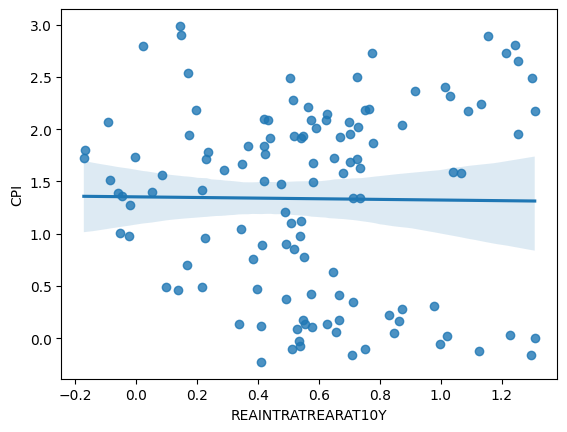

In [9]:
sns.regplot(x="REAINTRATREARAT10Y", y="CPI", data=Data_3)

The Pearson correlation is low (-0.012250149210767796) and scatter plot above show that there is no linearity relationship between inflation (CPI) and the real interest rate (reflecting the income stream of construction loan). Therefore, the income stream of construction loan face with the non-linearity challenges.

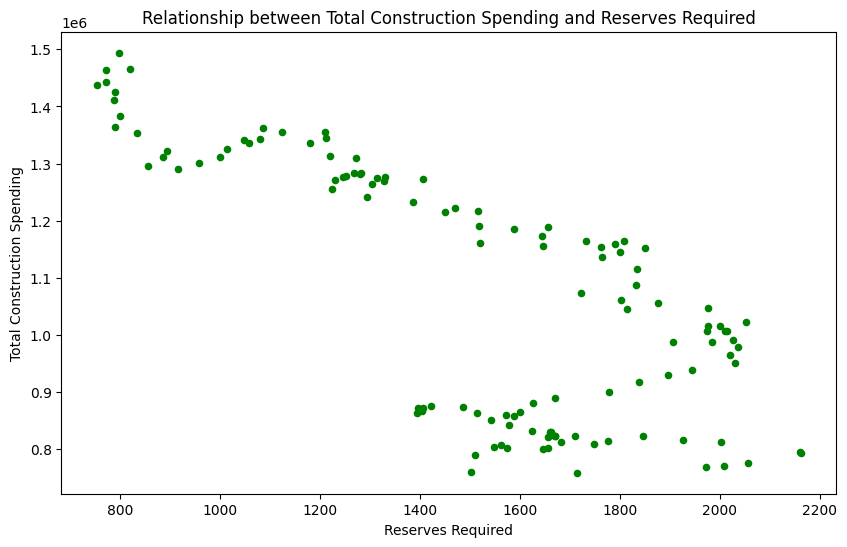

In [11]:
Data_3.plot(kind='scatter', x='Reserves Required', y='TTLCONS', figsize=(10, 6), color='green')

plt.title('Relationship between Total Construction Spending and Reserves Required')
plt.xlabel('Reserves Required')
plt.ylabel('Total Construction Spending')

plt.show()

If the required reserves of lenders are obligated to increased, the total construction spending will decrease. That indicates the regulation challenges.

**EDA - EXPLORATORY DATA ANALYSIS FOR SCENARIO 4 (The Publicly Traded Equity)**

In [13]:
# Load the dataset of dividend yield
Dividend = pd.read_csv('Dividend Yield.csv')
Dividend.head()

,Year,Dividend
0,2009,0.00%
1,2010,0.85%
2,2011,2.13%
3,2012,2.05%
4,2013,3.34%


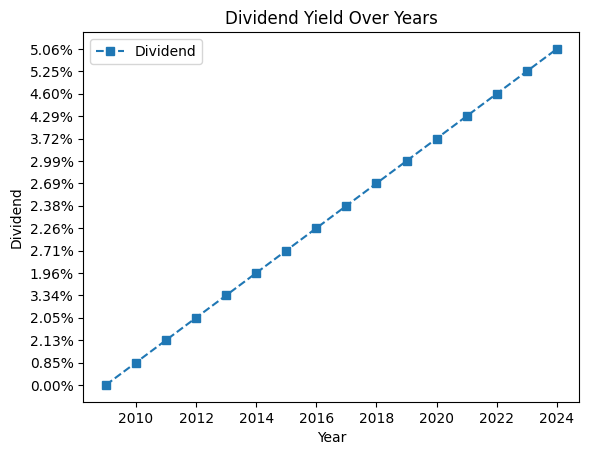

In [16]:
x = Dividend['Year']
y2 = Dividend['Dividend']

fig, ax = plt.subplots()
# Plot second data series
ax.plot(x, y2, label='Dividend', marker='s', linestyle='--')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Dividend')
ax.set_title('Dividend Yield Over Years')

# Add a legend
ax.legend()

# Display the plot
plt.show()

The dividend yield of China State Construction Engineering Corporation varied differently among years. There is year this number is zero. That means the income stream of lenders from the equity lending may change too; as a result, it faces the non-linearity challenges.

In [19]:
# Load the dataset
Data_4 = pd.read_csv('The Publicly Traded Equity Dataset 2.csv')
Data_4.head()

,DATE,Margin Loan,SP500,APPLE STOCK PRICE
0,2014-06-01,"272,103.666700","1,960.230000",23.232500
1,2014-07-01,"274,110.000000","1,930.670000",23.900000
2,2014-08-01,"268,748.666700","2,003.370000",25.625000
3,2014-09-01,"263,387.333300","1,972.290000",25.187500
4,2014-10-01,"258,026.000000","2,018.050000",27.000000


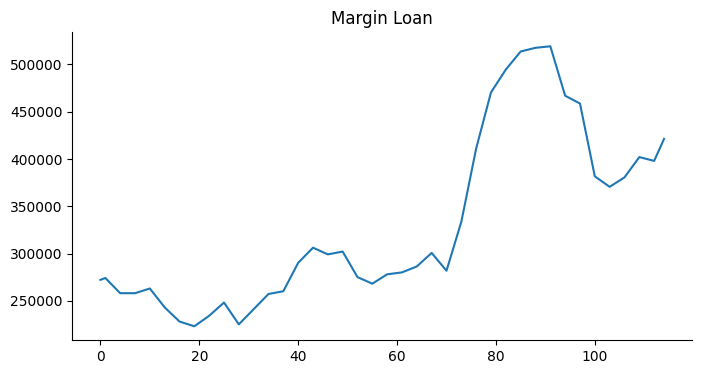

In [27]:
# @title Margin Loan

from matplotlib import pyplot as plt
Data_4['Margin Loan'].plot(kind='line', figsize=(8, 4), title='Margin Loan')
plt.gca().spines[['top', 'right']].set_visible(False)

The margin loan exists that means the leverage challenges survive. That is because the investors often borrow money ot stock to invest.

<Axes: xlabel='APPLE STOCK PRICE', ylabel='Margin Loan'>

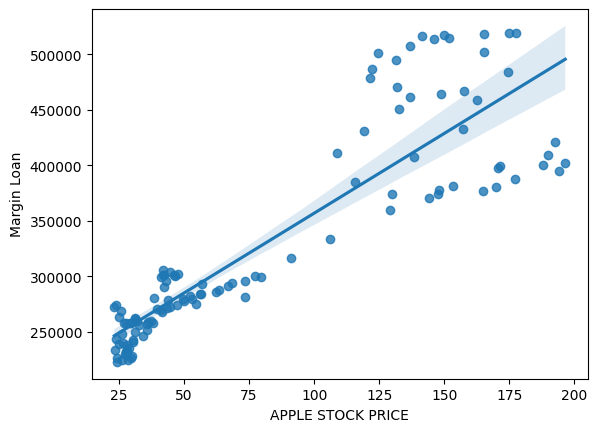

In [23]:
sns.regplot(x="APPLE STOCK PRICE", y="Margin Loan", data=Data_4)

Stock price of large companies have a linear relationship and positive correlation with the margin debt. That means when stock goes up, people tend to buy and hold stock. They rarely want to sell or lend to sell more stock. As a result, when market goes up, lenders will face the lidquidity challenges because they hardly make the equity lending.